In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from create_dataset import create_bunch_classification

comment_line_per_code_line Java is :  0.10344827586206896


## handeling the dataset

In [28]:

bcd = create_bunch_classification() # bcd stands for breast cancer dataset
print(f"Keys of Breast Cancer Dataset: {bcd.keys()}")


Keys of Breast Cancer Dataset: dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [29]:
# X -> features, y -> label
X = bcd.data
y = bcd.target 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bcd.data, bcd.target, test_size=0.33)


## loading models 

## DecisionTrees

In [6]:
clg_DT = DecisionTreeClassifier(random_state=1)
clg_DT.fit(X_train ,y_train)

clg_DT.predict(X_test)

accuracy_DT = clg_DT.score(X_test,y_test)
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)
cv_results = model_selection.cross_validate(clg_DT, X_train, y_train, cv=kfold , scoring = 'accuracy')
accuracy_DT_cross = np.mean(cv_results['test_score'])

# Print the results
print("Decision Tree accuracy on test set: {:.3f}".format(accuracy_DT))
print("Decision Tree cross-validation accuracy: {:.3f}".format(accuracy_DT_cross))




Logistic Regression accuracy on test set: 0.920
Logistic Regression cross-validation accuracy: 0.924


## CONFUSION MATRIX AND FEATURE IMPORTANCE FOR RANDOM FOREST 


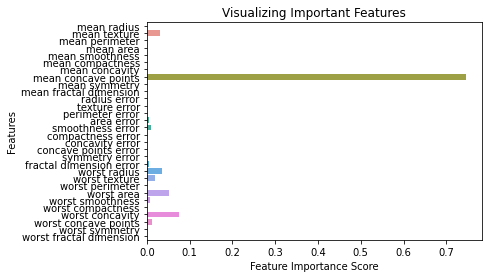

In [13]:
importance_DT = clg_DT.feature_importances_
# Create a barplot of feature importances
sns.barplot(x=importance_DT, y=bcd.feature_names)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## LogisticRegression 

In [15]:
clg_lr = LogisticRegression(max_iter=1000, solver='saga')
clg_lr.fit(X_train,y_train)
clg_lr.predict(X_test)

accuracy_lr = clg_lr.score(X_test,y_test)
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)
cv_results = model_selection.cross_validate(clg_lr, X_train, y_train, cv=kfold , scoring = 'accuracy')
accuracy_lr_cross = np.mean(cv_results['test_score'])
# Print the results
print("Logistic Regression accuracy on test set: {:.3f}".format(accuracy_lr))
print("Logistic Regression cross-validation accuracy: {:.3f}".format(accuracy_lr_cross))


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The m

Logistic Regression accuracy on test set: 0.931
Logistic Regression cross-validation accuracy: 0.911


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Randomforest

In [30]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=12345)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

accuracy_rf = clf_rf.score(X_test, y_test)
cv_results_rf = model_selection.cross_validate(clf_rf, X_train, y_train, cv=kfold, scoring='balanced_accuracy')
accuracy_rf_cross = np.mean(cv_results_rf['test_score'])

# Print the results
print("Random Forest accuracy on test set: {:.3f}".format(accuracy_rf))
print("Random Forest cross-validation accuracy: {:.3f}".format(accuracy_rf_cross))



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1999: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1999: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1999: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_

Random Forest accuracy on test set: 0.560
Random Forest cross-validation accuracy: 0.456


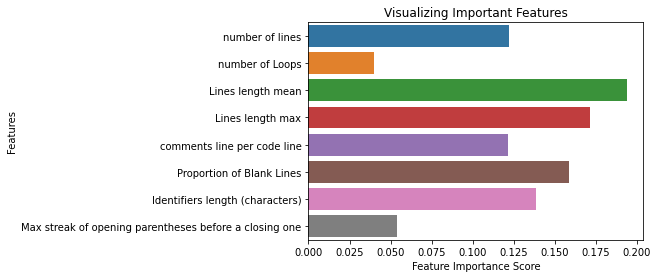

In [31]:
importance_rf = clf_rf.feature_importances_
# Create a barplot of feature importances
sns.barplot(x=importance_rf, y=bcd.feature_names)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Confusion Matrix - random forest :


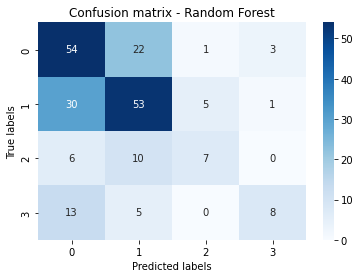

In [32]:
# Generate predictions on the test set
y_pred = np.argmax(clf_rf.predict(X_test), axis=-1)

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print confusion matrix
print("Confusion Matrix - random forest :")
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - Random Forest')
plt.show()

## SVM 

In [33]:
from sklearn import svm

# Create SVM classifier
svm_clf = svm.SVC()

# Fit the classifier to the data
svm_clf.fit(X_train, y_train)

# Predict on the test set
svm_preds = svm_clf.predict(X_test)

# Calculate accuracy
svm_accuracy = svm_clf.score(X_test, y_test)

# Calculate cross-validation accuracy
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)
cv_results = model_selection.cross_validate(svm_clf, X_train, y_train, cv=kfold , scoring = 'accuracy')
svm_accuracy_cross = np.mean(cv_results['test_score'])

# Print results
print("SVM accuracy on test set: {:.3f}".format(svm_accuracy))
print("SVM cross-validation accuracy: {:.3f}".format(svm_accuracy_cross))



SVM accuracy on test set: 0.427
SVM cross-validation accuracy: 0.373


In [34]:
importance_svm = svm_clf.feature_importances_
# Create a barplot of feature importances
sns.barplot(x=importance_DT, y=bcd.feature_names)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

AttributeError: 'SVC' object has no attribute 'feature_importances_'

## K nearest neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_clf = KNeighborsClassifier()

# Fit the classifier to the data
knn_clf.fit(X_train, y_train)

# Predict on the test set
knn_preds = knn_clf.predict(X_test)

# Calculate accuracy
knn_accuracy = knn_clf.score(X_test, y_test)

# Calculate cross-validation accuracy
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)
cv_results = model_selection.cross_validate(knn_clf, X_train, y_train, cv=kfold , scoring = 'accuracy')
knn_accuracy_cross = np.mean(cv_results['test_score'])

# Print results
print("KNN accuracy on test set: {:.3f}".format(knn_accuracy))
print("KNN cross-validation accuracy: {:.3f}".format(knn_accuracy_cross))



KNN accuracy on test set: 0.385
KNN cross-validation accuracy: 0.400


## Neurol network

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.utils import to_categorical

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=12345)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the target variable to a one-hot encoded representation
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Neural Network accuracy on test set: {:.3f}".format(accuracy))



Epoch 1/2


ValueError: in user code:

    File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 2) and (None, 4) are incompatible


In [12]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Generate confusion matrix
cm_nn = confusion_matrix(y_test.argmax(axis=1), y_pred)

# Print confusion matrix
print("Confusion Matrix - Neural Network:")
print(cm_nn)

4/4 [==============================] - 0s 2ms/step
Confusion Matrix - Neural Network:
[[38  4]
 [ 3 69]]
